In [1]:
import pandas as pd
import numpy as np

# import os
# import sys
# module_path = os.path.abspath(os.path.join('..'))
# print(module_path)
# sys.path.append(module_path)
import model.parts.utils as utils
from model.sys_params import *
df = pd.read_pickle(r'index_spoofer_experiment.p')

stakeDelegateds: 605 events
stakeDelegatedLockeds: 375 events
stakeDelegatedWithdrawns: 326 events
allocationCloseds: 47 events
allocationCollecteds: 16 events
stakeDepositeds: 25 events
rewardsAssigneds: 47 events
delegationParametersUpdateds: 6 events
allocationCreateds: 51 events
TOTAL NUMBER OF EVENTS: 1529
You should set SIMULATION_TIME_STEPS in config.py to a minimum of 1529 to capture all events.



In [2]:
df.head()
df.reset_index(inplace = True)

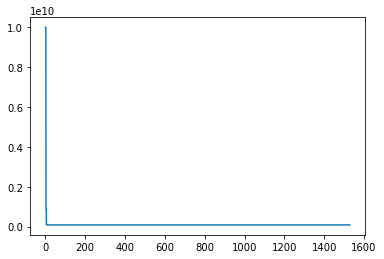

In [3]:
import matplotlib.pyplot as plt
GRT_list = []
for i in df['indexers']:
    GRT_list.append(i[1].GRT)
plt.plot(df.index, GRT_list)

In [4]:
df['indexers'][1500][1].subgraphs['1'].allocations['1']

In [5]:
df['indexers'][1528][1].delegators

{1: self.id=1, self.shares=Decimal('0E-18'), self.holdings=Decimal('863407948.835085250241080486'), self.undelegated_tokens=Decimal('8333333333.333332099752194862')}

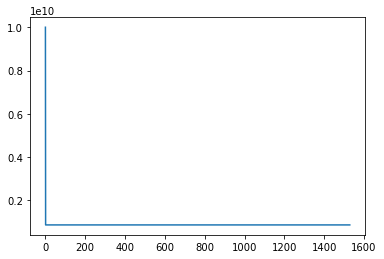

In [13]:
holdings_list = []
for i in df['indexers']:
    if 1 not in i[1].delegators:
        holdings_list.append(0)
    else:
        holdings_list.append(i[1].delegators[1].holdings)
plt.plot(df.index, holdings_list)

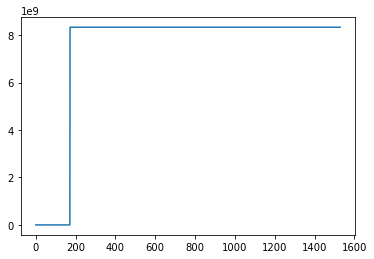

In [14]:
undelegated_list = []
for i in df['indexers']:
    if 1 not in i[1].delegators:
        undelegated_list.append(0)
    else:
        undelegated_list.append(i[1].delegators[1].undelegated_tokens)
plt.plot(df.index, undelegated_list)

Here we see that the agent undelegates after setting the index reward to 0.

In [7]:
df['indexers'][1234][1].indexer_revenue_cut

0.001

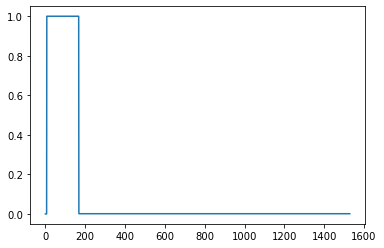

In [8]:
subgraph_list = []
for i in df['indexers']:
    if i[1].indexer_revenue_cut == None:
        subgraph_list.append(0)
    else:
        subgraph_list.append(i[1].indexer_revenue_cut)
plt.plot(df.index, subgraph_list)

Here we see that after the desired waiting period, the spoofer sets the revenue cut to 0%.

In [9]:
df['indexers'][1][1].subgraphs['1'].allocations
 

{}

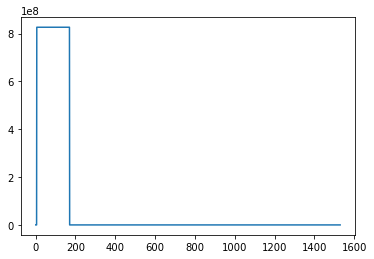

In [10]:
alloc_list = []
for i in df['indexers']:
    if '1' in i[1].subgraphs['1'].allocations.keys():
        alloc_list.append(i[1].subgraphs['1'].allocations['1'].tokens)
    else: 
        alloc_list.append(0)
plt.plot(df.timestep, alloc_list)

Here we see that the allocation gets closed after the spoofer sets the cut to 0%.

In [11]:
df.head()

,index,indexers,delegator_portfolios,block_number,epoch,injected_event_shift,simulation,subset,run,substep,timestep
0,6,{1: <model.parts.index_spoofer.IndexSpoofer ob...,{},11474009,4,1,0,0,1,6,1
1,12,{1: <model.parts.index_spoofer.IndexSpoofer ob...,{},11474009,4,1,0,0,1,6,2
2,18,{1: <model.parts.index_spoofer.IndexSpoofer ob...,{},11474009,4,2,0,0,1,6,3
3,24,{1: <model.parts.index_spoofer.IndexSpoofer ob...,{},11474009,4,2,0,0,1,6,4
4,30,{1: <model.parts.index_spoofer.IndexSpoofer ob...,{},11474307,4,3,0,0,1,6,5
